In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

# trainに60000個の訓練用データ、testに10000個のテストデータが入る
(x_train,y_train),(x_test,y_test) = mnist.load_data()

<hr>
<hr>

# データ図示

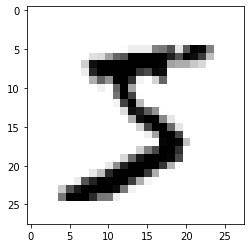

↑の目標値：5


In [3]:
#最初のデータだけ図示
x0 = x_train[0]

# ヒートマップにして表示
plt.figure()
plt.imshow(x0,interpolation='nearest',vmin=0,vmax=255,cmap='binary')
plt.show()

#ちなみに認識結果（目標値）は
print('↑の目標値：{0}'.format(y_train[0]))

<hr>
<hr>

# データ変形

In [4]:
from keras.utils import np_utils

In [5]:
#行列の型を変換
x_train = x_train.reshape(60000,28*28)
#float型に変換
x_train = x_train.astype('float32')
#0~1の値に収める
x_train = x_train/255
#目標データも1-of-K符号化法で表す
y_train = np_utils.to_categorical(y_train,10)

In [6]:
#同じことをテストデータに対しても行う
x_test = x_test.reshape(10000,28*28)
x_test = x_test.astype('float32')
x_test = x_test/255
y_test = np_utils.to_categorical(y_test,10)

<hr>
<hr>

# 学習

In [7]:
#ニューラルネットワークの定義
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam

#モデルの定義
model = Sequential()
#784次元を入力とする16個の中間層を定義する。活性化関数はシグモイド関数
model.add(Dense(16,input_dim=784,activation='sigmoid'))
#10個の出力層を定義する。活性化関数はソフトマックス関数
model.add(Dense(10,activation='softmax'))
#学習方法の設定。目的関数を交差エントロピー誤差、学習の評価として正答率を計算、アルゴリズムをAdamに設定
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [8]:
#学習を行わせる。trainは訓練データ、全データを学習に使う回数:10、validation_dataにテストデータ。(verbose=1で進行状況表示)
history=model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test))
#学習の評価値を出力
score=model.evaluate(x_test,y_test,verbose=0)


print('交差エントロピー誤差:',score[0])
print('正答率:',score[1])

Epoch 1/10
60/60 [==============================] - 0s 5ms/step - loss: 2.0283 - accuracy: 0.4085 - val_loss: 1.7132 - val_accuracy: 0.6433
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 1.5358 - accuracy: 0.7410 - val_loss: 1.3655 - val_accuracy: 0.7997
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 1.2507 - accuracy: 0.8131 - val_loss: 1.1273 - val_accuracy: 0.8337
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 1.0458 - accuracy: 0.8370 - val_loss: 0.9534 - val_accuracy: 0.8510
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.8960 - accuracy: 0.8513 - val_loss: 0.8254 - val_accuracy: 0.8644
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7841 - accuracy: 0.8630 - val_loss: 0.7285 - val_accuracy: 0.8731
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.8724 - val_loss: 0.6526 - val_accuracy: 0.8811
Epoch 8/10
60/60 [==

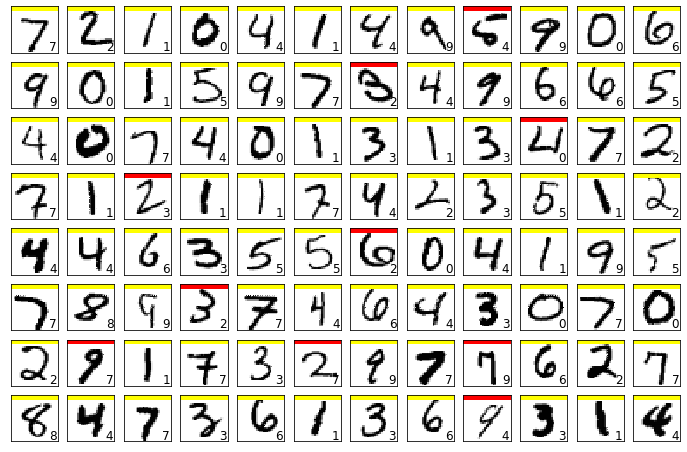

In [9]:
#実際にテストデータを何個か評価してみる
y=model.predict(x_test)
plt.figure(2,figsize=(12,8))
plt.gray()
for i in range(12*8):
    plt.subplot(8,12,i+1)
    x=x_test[i,:]
    x=x.reshape(28,28)
    plt.pcolor(1-x)
    wk=y[i,:]
    prediction=np.argmax(wk)
    plt.text(22,25.5,"%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i,:]):
        plt.plot([0,27],[1,1],color='red',linewidth=5)
    else:
        plt.plot([0,27],[1,1],color='yellow',linewidth=5)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([],"")
    plt.yticks([],"")

plt.show()    

<hr>
<hr>

# ReLUで学習

In [10]:
#モデルの定義
model = Sequential()
#784次元を入力とする16個の中間層を定義する。活性化関数はReLU関数
model.add(Dense(16,input_dim=784,activation='relu'))
#10個の出力層を定義する。活性化関数はソフトマックス関数
model.add(Dense(10,activation='softmax'))
#学習方法の設定。目的関数を交差エントロピー誤差、学習の評価として正答率を計算、アルゴリズムをAdamに設定
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

#学習を行わせる。trainは訓練データ、全データを学習に使う回数:10、validation_dataにテストデータ。(verbose=1で進行状況表示)
history=model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test))
#学習の評価値を出力
score=model.evaluate(x_test,y_test,verbose=0)


print('交差エントロピー誤差:',score[0])
print('正答率:',score[1])

Epoch 1/10
60/60 [==============================] - 0s 6ms/step - loss: 1.5660 - accuracy: 0.5108 - val_loss: 0.8799 - val_accuracy: 0.7996
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 0.6499 - accuracy: 0.8400 - val_loss: 0.4767 - val_accuracy: 0.8815
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 0.4400 - accuracy: 0.8855 - val_loss: 0.3764 - val_accuracy: 0.9010
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3660 - accuracy: 0.9014 - val_loss: 0.3285 - val_accuracy: 0.9110
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3255 - accuracy: 0.9113 - val_loss: 0.2989 - val_accuracy: 0.9179
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.2999 - accuracy: 0.9170 - val_loss: 0.2805 - val_accuracy: 0.9231
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.2819 - accuracy: 0.9214 - val_loss: 0.2671 - val_accuracy: 0.9264
Epoch 8/10
60/60 [==

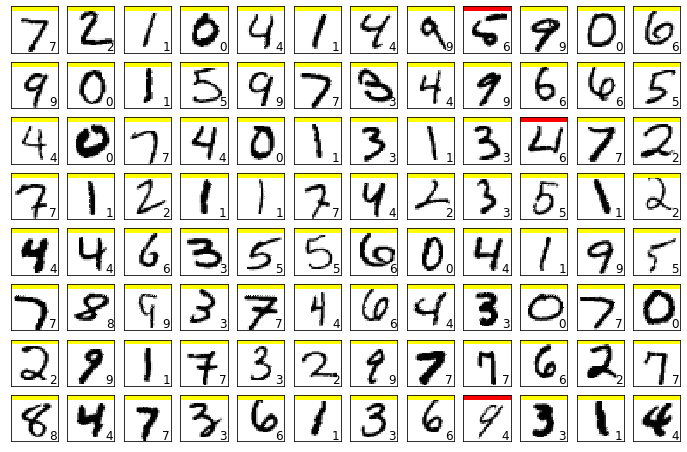

In [11]:
#再評価
#実際にテストデータを何個か評価してみる
y=model.predict(x_test)
plt.figure(2,figsize=(12,8))
plt.gray()
for i in range(12*8):
    plt.subplot(8,12,i+1)
    x=x_test[i,:]
    x=x.reshape(28,28)
    plt.pcolor(1-x)
    wk=y[i,:]
    prediction=np.argmax(wk)
    plt.text(22,25.5,"%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i,:]):
        plt.plot([0,27],[1,1],color='red',linewidth=5)
    else:
        plt.plot([0,27],[1,1],color='yellow',linewidth=5)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([],"")
    plt.yticks([],"")

plt.show()  

<hr>
<hr>

# フィルター適用

In [12]:
#リセット
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam

In [14]:
#データ再読み込み
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#最初のデータ
x0 = x_train[0]

x_train = x_train.reshape(60000,28*28)
x_train = x_train.astype('float32')
x_train = x_train/255
y_train = np_utils.to_categorical(y_train,10)

x_test = x_test.reshape(10000,28*28)
x_test = x_test.astype('float32')
x_test = x_test/255
y_test = np_utils.to_categorical(y_test,10)

In [15]:
#3*3フィルター
filter = np.array([[0,1,1],[0,1,1],[0,1,1]])
print(filter)


[[0 1 1]
 [0 1 1]
 [0 1 1]]


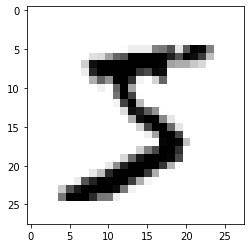

In [16]:
#元画像の表示
plt.figure()
plt.imshow(x0,interpolation='nearest',vmin=0,vmax=255,cmap='binary')
plt.show()

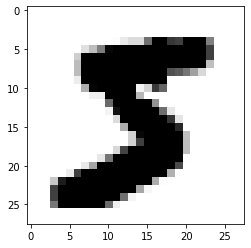

In [17]:
#フィルター適用
def do_filter(x,f):
    filtered=np.zeros((len(x),len(x[0])))
    for i in range(len(x)):
        if(i==0 or i==len(x)-1):
            continue
        else:
            for j in range(len(x[0]-3)):
                if(j==0 or j==len(x[0])-1):
                    continue
                else:
                    gij=0
                    for u in range(-1,2):
                        for v in range(-1,2):
                            gij+=x[i+u][j+v]*f[u+1][v+1]
                    filtered[i][j]=gij
    return filtered

#図示
x0_filtered=do_filter(x0,filter)
plt.figure()
plt.imshow(x0_filtered,interpolation='nearest',vmin=0,vmax=255,cmap='binary')
plt.show()

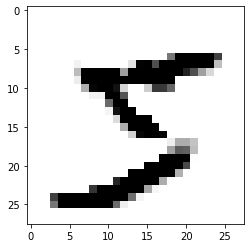

In [18]:
#違うフィルターを適用してみる
filter2 = np.array([[1,1,1],[1,1,1],[-2,-2,-2]])

#図示
x0_filtered=do_filter(x0,filter2)
plt.figure()
plt.imshow(x0_filtered,interpolation='nearest',vmin=0,vmax=255,cmap='binary')
plt.show()

<hr>
<hr>

# CNN

In [19]:
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.optimizers import Adam

In [20]:
#データ再読み込み
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_train = x_train.astype('float32')
x_train = x_train/255
y_train = np_utils.to_categorical(y_train,10)

x_test = x_test.reshape(10000,28,28,1)
x_test = x_test.astype('float32')
x_test = x_test/255
y_test = np_utils.to_categorical(y_test,10)

In [21]:
#CNN
model2=Sequential()
#コンボリューション層定義、3*3のフィルターを8枚使用、パディング使用(same)、input_shape:入力画像のサイズ
model2.add(Conv2D(8,(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
#コンボリューション層の出力の次元を(バッチ数、フィルター数*出力画像縦幅*出力画像横幅)にさせる
model2.add(Flatten())
#出力層定義、10個で活性化関数はソフトマックス関数
model2.add(Dense(10,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

history=model2.fit(x_train,y_train,epochs=20,batch_size=1000,verbose=1,validation_data=(x_test,y_test))
score=model2.evaluate(x_test,y_test,verbose=0)

print('交差エントロピー誤差:',score[0])
print('正答率:',score[1])

Epoch 1/20
60/60 [==============================] - 5s 81ms/step - loss: 0.8750 - accuracy: 0.8007 - val_loss: 0.3602 - val_accuracy: 0.9013
Epoch 2/20
60/60 [==============================] - 5s 78ms/step - loss: 0.3119 - accuracy: 0.9110 - val_loss: 0.2524 - val_accuracy: 0.9299
Epoch 3/20
60/60 [==============================] - 5s 78ms/step - loss: 0.2317 - accuracy: 0.9345 - val_loss: 0.1929 - val_accuracy: 0.9474
Epoch 4/20
60/60 [==============================] - 5s 79ms/step - loss: 0.1782 - accuracy: 0.9504 - val_loss: 0.1509 - val_accuracy: 0.9595
Epoch 5/20
60/60 [==============================] - 5s 81ms/step - loss: 0.1434 - accuracy: 0.9607 - val_loss: 0.1280 - val_accuracy: 0.9648
Epoch 6/20
60/60 [==============================] - 5s 79ms/step - loss: 0.1207 - accuracy: 0.9671 - val_loss: 0.1106 - val_accuracy: 0.9704
Epoch 7/20
60/60 [==============================] - 5s 85ms/step - loss: 0.1052 - accuracy: 0.9718 - val_loss: 0.0997 - val_accuracy: 0.9735
Epoch 8/20
60

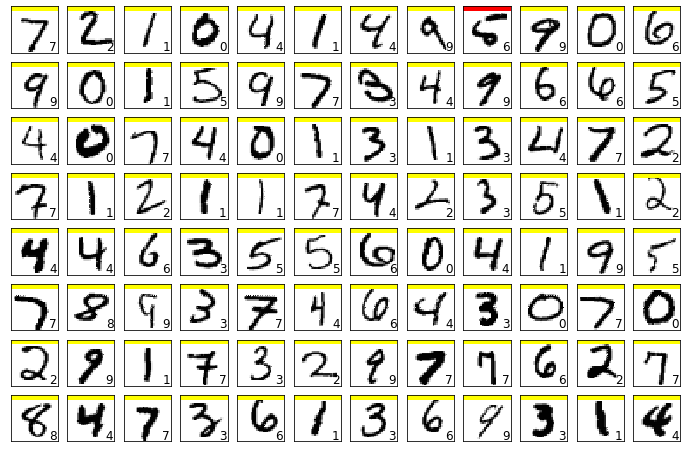

In [22]:
#再評価
#実際にテストデータを何個か評価してみる
y=model2.predict(x_test)
plt.figure(2,figsize=(12,8))
plt.gray()
for i in range(12*8):
    plt.subplot(8,12,i+1)
    x=x_test[i,:]
    x=x.reshape(28,28)
    plt.pcolor(1-x)
    wk=y[i,:]
    prediction=np.argmax(wk)
    plt.text(22,25.5,"%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i,:]):
        plt.plot([0,27],[1,1],color='red',linewidth=5)
    else:
        plt.plot([0,27],[1,1],color='yellow',linewidth=5)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([],"")
    plt.yticks([],"")

plt.show() 